## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions


In [36]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [37]:
#from google.colab import files
#uploaded = files.upload()

In [38]:
data = pd.read_csv('FB.csv')

In [39]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2249,2021-04-28,307.359985,310.920013,305.369995,307.100006,307.100006,33907200
2250,2021-04-29,330.119995,331.809998,321.609985,329.510010,329.510010,56526800
2251,2021-04-30,326.140015,329.820007,324.500000,325.079987,325.079987,26322000
2252,2021-05-03,326.170013,328.549988,321.839996,322.579987,322.579987,18719500


In [40]:
#reading the data and converting the Date column into pandas datetime object and also making it the index
data = pd.read_csv('FB.csv')
data.index = data['Date']
data.drop(['Date'], axis = 1, inplace = True)
data.index = pd.to_datetime(data.index)

In [41]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2021-04-28,307.359985,310.920013,305.369995,307.100006,307.100006,33907200
2021-04-29,330.119995,331.809998,321.609985,329.510010,329.510010,56526800
2021-04-30,326.140015,329.820007,324.500000,325.079987,325.079987,26322000


In [42]:
data.isnull().sum() #checking if there are any null or infinite values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualizing the Data

In [43]:
data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)

In [44]:
data

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999
...,...
2021-04-28,307.100006
2021-04-29,329.510010
2021-04-30,325.079987


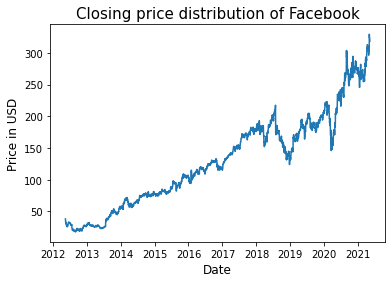

In [45]:
plot.plot(data['Close'])
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of Facebook", fontsize=15)
plot.show()

In [46]:
df = data['Close']

# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

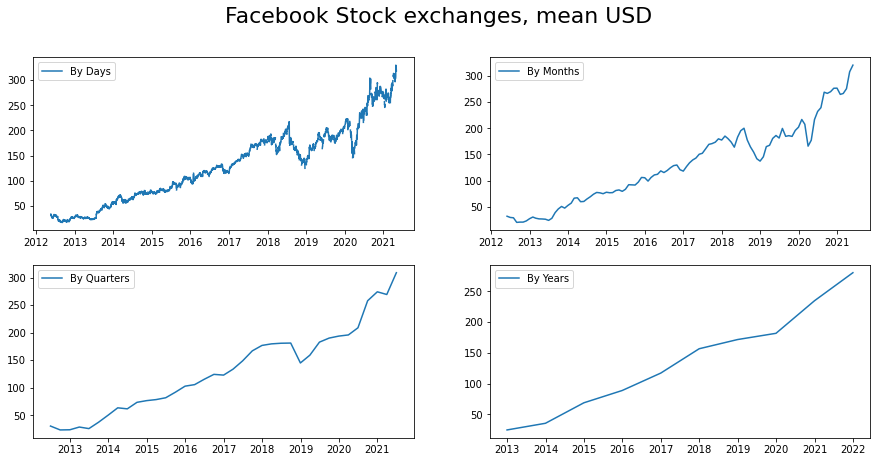

In [47]:
# PLOTS
fig = plot.figure(figsize=[15, 7])
plot.suptitle('Facebook Stock exchanges, mean USD', fontsize=22)

plot.subplot(221)
plot.plot(df, '-', label='By Days')
plot.legend()

plot.subplot(222)
plot.plot(df_month, '-', label='By Months')
plot.legend()

plot.subplot(223)
plot.plot(df_Q, '-', label='By Quarters')
plot.legend()

plot.subplot(224)
plot.plot(df_year, '-', label='By Years')
plot.legend()

# plt.tight_layout()
plot.show()

# Checking Stationarity of the data

In [48]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=22,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationary")
            break
         else:
            print("The graph is stationary")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

In [49]:
df = df.fillna(method='ffill')

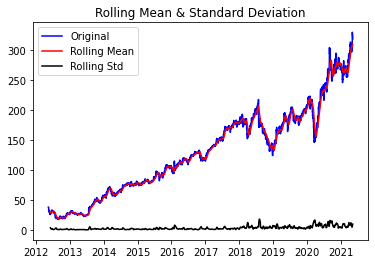

ADF Stastistic: 0.290173
p-value: 0.976889
The graph is non stationary
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [50]:
test_stationarity(df)

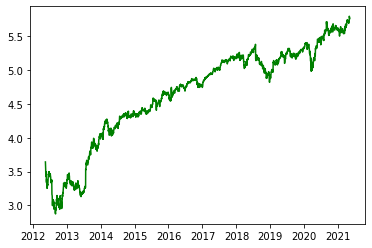

In [51]:
ts_log = np.log(data['Close'])
plot.plot(ts_log,color="green")
plot.show()

In [52]:
data['Log transformed'] = ts_log 

In [53]:
#print(data['Close'].head(5))
print(ts_log.head(5))
print(ts_log.shift().head(5))
#print((ts_log-ts_log.shift()).head(5))

Date
2012-05-18    3.643621
2012-05-21    3.527242
2012-05-22    3.433987
2012-05-23    3.465736
2012-05-24    3.497416
Name: Close, dtype: float64
Date
2012-05-18         NaN
2012-05-21    3.643621
2012-05-22    3.527242
2012-05-23    3.433987
2012-05-24    3.465736
Name: Close, dtype: float64


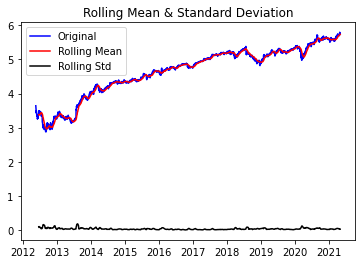

ADF Stastistic: -1.119144
p-value: 0.707377
The graph is non stationary
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [54]:
test_stationarity(data['Log transformed'])

In [55]:
#[1 2 3 4 5 6 7 8 9 10] - [NaN 1 2 3 4 5 6 7 8 9] = [Nan ...]

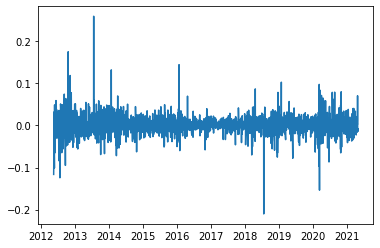

In [56]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

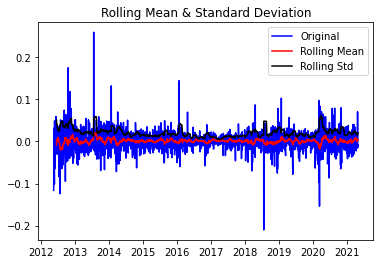

ADF Stastistic: -16.092886
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [57]:
test_stationarity(ts_log_diff.dropna())

In [58]:
data['Shifted Log transformed'] = ts_log_diff

In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

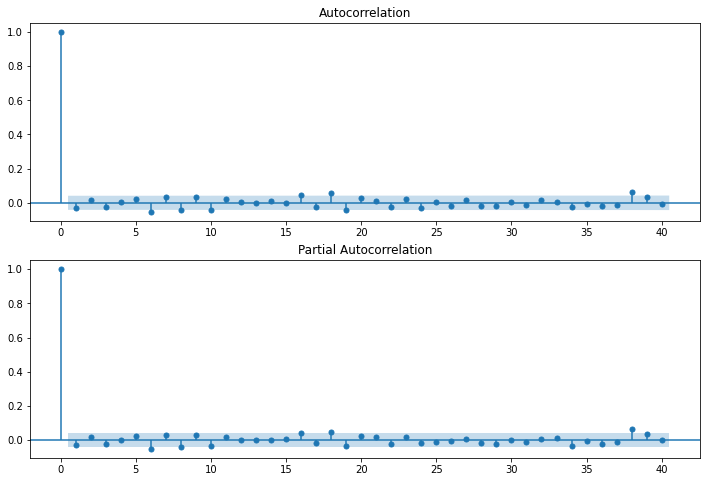

In [60]:
fig = plot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Shifted Log transformed'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Shifted Log transformed'].dropna(),lags=40,ax=ax2)

# Making Predictions

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [82]:
for t in range(len(test_arima)):
    x = t
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [75]:
size = int(len(ts_log)-365)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    #predict value  is the first output given by ARIMA
    pred_value = output[0]
    
    #replace  original_value by test_arima[t] i.e. recurrent true value replace original
    original_value = test_arima[t]

    #adding recurrent true value into history data i.e. predict next price by true data before this moment
    history.append(original_value)
    
    #使用指数函数还原data
    pred_value = np.exp(pred_value)
    
    original_value = np.exp(original_value)
    
    # Calculating the error, in this way the error for every predict close pirce will be small 
    # example:(abs(pred_value - original_value))=5,but original_value is 300,then 5/300=1/6 is a small number
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    


Printing Predicted vs Expected Values...




/mnt/wanyao/hhf/gymenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted = 199.508814,   expected = 197.509995,   error = 1.012009  %
predicted = 197.667049,   expected = 197.929993,   error = 0.132847  %
predicted = 198.103450,   expected = 198.820007,   error = 0.360405  %
predicted = 198.998918,   expected = 199.789993,   error = 0.395953  %
predicted = 199.970967,   expected = 198.970001,   error = 0.503074  %
predicted = 199.135981,   expected = 202.000000,   error = 1.417831  %
predicted = 202.199102,   expected = 201.639999,   error = 0.277278  %
predicted = 201.813776,   expected = 199.699997,   error = 1.058477  %
predicted = 199.857977,   expected = 198.820007,   error = 0.522065  %
predicted = 198.984134,   expected = 198.710007,   error = 0.137953  %
predicted = 198.880044,   expected = 199.360001,   error = 0.240749  %
predicted = 199.536920,   expected = 201.050003,   error = 0.752590  %
predicted = 201.237446,   expected = 201.339996,   error = 0.050934  %
predicted = 201.517241,   expected = 200.869995,   error = 0.322221  %
predic

/mnt/wanyao/hhf/gymenv/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


predicted = 205.434450,   expected = 209.779999,   error = 2.071479  %
predicted = 210.001149,   expected = 208.669998,   error = 0.637921  %
predicted = 208.844386,   expected = 212.600006,   error = 1.766519  %
predicted = 212.818973,   expected = 213.059998,   error = 0.113125  %
predicted = 213.253102,   expected = 215.220001,   error = 0.913902  %
predicted = 215.428912,   expected = 218.300003,   error = 1.315204  %
predicted = 218.521022,   expected = 218.059998,   error = 0.211421  %
predicted = 218.254763,   expected = 221.910004,   error = 1.647173  %
predicted = 222.141402,   expected = 219.059998,   error = 1.406648  %
predicted = 219.236698,   expected = 221.149994,   error = 0.865157  %
predicted = 221.364730,   expected = 221.770004,   error = 0.182745  %
predicted = 221.975950,   expected = 222.139999,   error = 0.073849  %
predicted = 222.344125,   expected = 221.440002,   error = 0.408292  %
predicted = 221.634981,   expected = 221.320007,   error = 0.142316  %
predic

/mnt/wanyao/hhf/gymenv/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted = 170.387784,   expected = 146.009995,   error = 16.695973  %
predicted = 146.543757,   expected = 149.419998,   error = 1.924937  %
predicted = 149.361122,   expected = 146.960007,   error = 1.633856  %
predicted = 147.153531,   expected = 153.130005,   error = 3.902876  %
predicted = 153.072605,   expected = 149.729996,   error = 2.232425  %
predicted = 149.958462,   expected = 148.100006,   error = 1.254866  %
predicted = 148.209641,   expected = 160.979996,   error = 7.932883  %
predicted = 160.787858,   expected = 156.210007,   error = 2.930575  %
predicted = 156.511311,   expected = 163.339996,   error = 4.180657  %
predicted = 163.215175,   expected = 156.789993,   error = 4.097954  %
predicted = 157.155589,   expected = 165.949997,   error = 5.299432  %
predicted = 165.699681,   expected = 166.800003,   error = 0.659665  %
predicted = 167.004113,   expected = 159.600006,   error = 4.639165  %
predicted = 159.919474,   expected = 158.190002,   error = 1.093288  %
predi

/mnt/wanyao/hhf/gymenv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted = 325.797345,   expected = 322.579987,   error = 0.997383  %
predicted = 322.811857,   expected = 318.359985,   error = 1.398377  %



 Mean Error in Predicting Test Case Articles : 1.843868  %


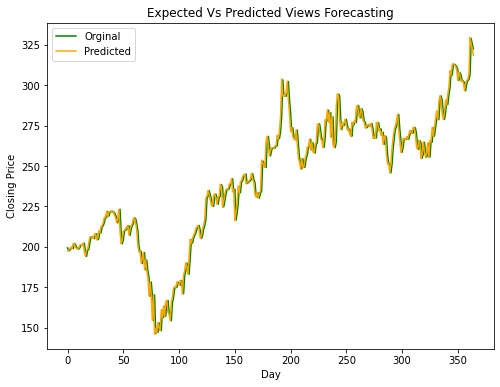

In [66]:
# After iterating over whole test set the overall mean error is calculated.   
#Calculate Mean Error (sum(error_list)/float(len(error_list)))
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()